In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
from Project.constants import Constants as pc
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from tabulate import tabulate
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_sim_dict.json','r'))
for gal in dmo:
    dmo[gal]['core_fit'] = dmo[gal]['sidm_fit']
    dmo[gal]['cusp_fit'] = dmo[gal]['nfw_fit']
bry = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))
sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict_comb.json','r'))
sel_gals = json.load(open('../../obs_RC_v4/Output/result_dicts/selected_gals_comb.json','r'))

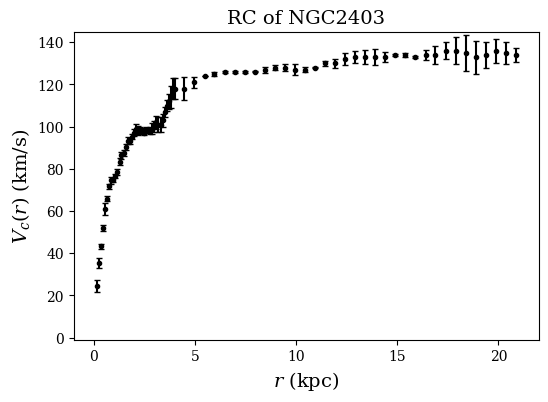

In [4]:
gal = 'NGC2403'
prior = 'lcdm_vmax_shm'
gald = sparcd[prior][gal]
r = gald['r']
vc = gald['vc']
ve = gald['ve']
vg = gald['vg']
vd = np.array(gald['vd'])
yd = gald['core_fit']['yd'][0]
vD = np.sqrt(yd)*vd
vdark = gald['core_fit']['vdark']
vm = gald['core_fit']['vcmodel']


fig,ax = plt.subplots(figsize = (6,4))
ax.errorbar(r,vc,ve, fmt = '.',color = 'k', capsize = 2)

# ax.plot(r,vg,color = 'b')
# ax.text(18,45, '$V_{\mathrm{gas}}$',color = 'b', size = 14)

# ax.plot(r,vd,color = 'r')
# ax.text(6,90,'$V_{\mathrm{star}}$',color ='r', size = 12)

# ax.plot(r,vD,color = 'r',ls = '--')
# ax.text(6,50,r'$\sqrt{\Upsilon_{d}}\times V_{\mathrm{star}}$',color ='r', size = 12)

# ax.plot(r,vdark,color = 'k',lw = 2)
# ax.text(18,108,'$V_{\mathrm{DM}}$',size = 14)
# ax.plot(r,vm,color = pa.purple,lw = 4)

ax.set_xlabel('$r$ (kpc)',size = 14)
ax.set_ylabel('$V_c(r)$ (km/s)',size = 14)
ax.set_title('RC of %s'%gal,size = 14)

ax.set_ylim(-1,145)
ax.set_xlim(-1,22)

plt.savefig('../Output/presentation1/%s_1.png'%gal,bbox_inches = 'tight',dpi = 300)

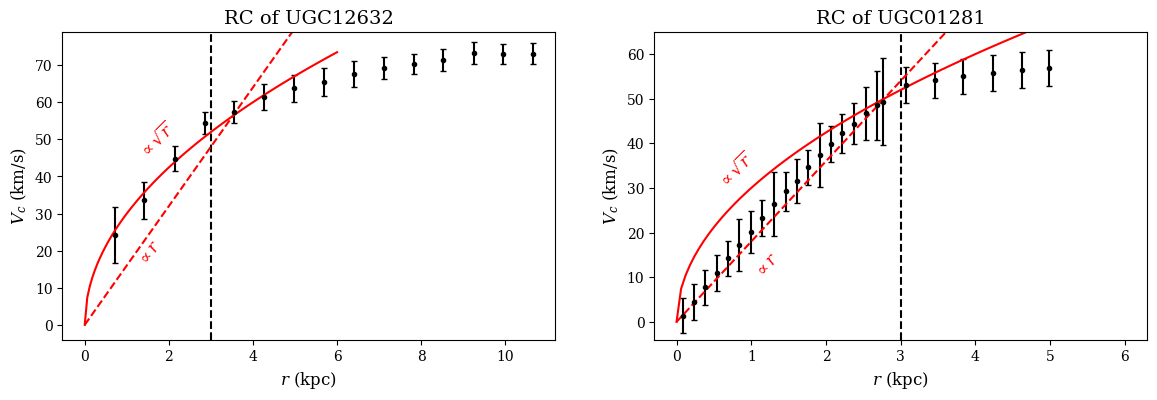

In [5]:
gal1 = 'UGC12632'
gal2 = 'UGC01281'
gals = [gal1,gal2]
fig,axs = plt.subplots(1,2,figsize = (14,4))
ylim = [[-4,79],[-4,65]]
for i in range(2):
    gal = gals[i]
    ax = axs[i]
    gald = sparcd[prior][gal]
    ax.errorbar(gald['r'], gald['vc'], gald['ve'],fmt = '.', color = 'k', capsize = 2)
    ax.plot([3,3],ylim[i],ls = '--', c = 'k')
    ax.set_ylim(ylim[i])
    ax.set_title('RC of %s'%gals[i],size = 14)
    ax.set_xlabel('$r$ (kpc)',size = 12)
    ax.set_ylabel('$V_c$ (km/s)',size = 12)
    if i == 0:
        r = np.linspace(0,6,100)
        ax.plot(r,30*np.sqrt(r), c = 'r')
        ax.plot(r,16*r, c = 'r', ls = '--')
        ax.text(1.2,16,'$\propto r$',size = 12, rotation = 55, color = 'r')
        ax.text(1.2,45,'$\propto \sqrt{r}$',size = 12, rotation = 45, color = 'r')
    if i == 1:
        ax.plot(r,30*np.sqrt(r), c = 'r')
        ax.plot(r,18*r, c = 'r', ls = '--')
        ax.text(0.5, 30,'$\propto \sqrt{r}$',size = 12, rotation = 45, color = 'r')
        ax.text(1, 10, '$\propto r$',size = 12, rotation = 50, color = 'r')
        
plt.savefig('../Output/presentation1/Inner_slope_compare.png',bbox_inches = 'tight')

In [6]:
bestgals = json.load(open('../Output/Bestgals.json','r'))
bestgals = bestgals['CC_HP_75']
prior = 'lcdm_vmax_shm'
Bestgals = np.array(bestgals)
lbfs = np.array([sparcd[prior][gal]['delta_lnZ'] for gal in bestgals])
inds = lbfs.argsort()
bestgals = Bestgals[inds]

In [232]:
Details = []
cell = lambda a: '$%.2f \pm %.2f$'%(a[0],a[1])
for gal in bestgals:
    lbf = sparcd[prior][gal]['delta_lnZ']
    bestfit = 'cusp_fit' if lbf < 0 else 'core_fit' 
    
    gald = sparcd[prior][gal][bestfit]
    model = 'Cusp' if bestfit == 'cusp_fit' else 'Core'
    r1data = cAell(gald['r1']) if bestfit == 'core_fit' else '-' 
    rsize = sparcd[prior][gal]['rlast']/gald['rs'][0]
    galdetails = [gal,model,lbf,cell(gald['lm']),cell(gald['c200']),r1data,
                  cell(gald['yd']),cell(gald['lmstar']),rsize]
    Details.append(galdetails)
    
    if np.abs(lbf) < 1:
        bestfit2 = 'core_fit' if bestfit == 'cusp_fit' else 'cusp_fit'
        gald = sparcd[prior][gal][bestfit2]
        model = 'Cusp' if bestfit2 == 'cusp_fit' else 'Core'
        r1data = cell(gald['r1']) if bestfit == 'core' else '-' 
        rsize = sparcd[prior][gal]['rlast']/gald['rs'][0]
        galdetails = ['',model,lbf,cell(gald['lm']),cell(gald['c200']),r1data,
                      cell(gald['yd']),cell(gald['lmstar']),rsize]
        Details.append(galdetails)
    
header  = ['Galaxy', 'Model', '$\lbf$', '$\lms$', '$c_{200}$', '$r_c$', '$\yd$', '$\lmstar$', r'$\rsize$']
table = tabulate(Details,tablefmt = 'latex_raw',floatfmt = '.2f',missingval = '-',headers = header )
print (table)

\begin{tabular}{llrlllllr}
\hline
 Galaxy   & Model   &   $\lbf$ & $\lms$           & $c_{200}$        & $r_c$            & $\yd$           & $\lmstar$        &   $\rsize$ \\
\hline
 NGC5371  & Cusp    &   -42.97 & $11.85 \pm 0.01$ & $29.11 \pm 1.13$ & -                & $0.14 \pm 0.01$ & $10.70 \pm 0.02$ &       7.47 \\
 UGC02259 & Cusp    &    -1.60 & $10.91 \pm 0.04$ & $15.56 \pm 1.02$ & -                & $0.43 \pm 0.14$ & $8.84 \pm 0.14$  &       1.43 \\
 UGC05716 & Cusp    &    -1.52 & $10.92 \pm 0.01$ & $7.68 \pm 0.20$  & -                & $0.67 \pm 0.08$ & $8.56 \pm 0.05$  &       1.07 \\
 F579-V1  & Cusp    &    -1.42 & $11.30 \pm 0.20$ & $14.19 \pm 3.57$ & -                & $0.47 \pm 0.12$ & $9.68 \pm 0.11$  &       1.64 \\
 NGC1705  & Cusp    &    -1.20 & $10.80 \pm 0.18$ & $16.74 \pm 4.35$ & -                & $0.78 \pm 0.21$ & $8.59 \pm 0.12$  &       1.13 \\
 UGC12506 & Cusp    &    -0.78 & $12.09 \pm 0.04$ & $18.19 \pm 1.83$ & -                & $0.38 \pm 0.10$ & $10.6

In [284]:
burkert = lambda r,rhob = 1e7, rb = 5: rhob/((1 + (r/rb))*(1 + (r/rb)**2))

newr = lambda ri,n = 100: np.linspace(0.1,ri,int(n))

def vel_burkert(r,rhob,rb):
    M = np.array([np.trapz(burkert(newr(ri),rhob,rb)*newr(ri)**2, newr(ri))*4*np.pi for ri in r])
    return np.sqrt(pc.G*M/r)

rhob,rb = 1e7,5
r = newr(1e2,1e3)
burk = burkert(r,rhob,rb)
vburk = vel_burkert(r,rhob,rb)

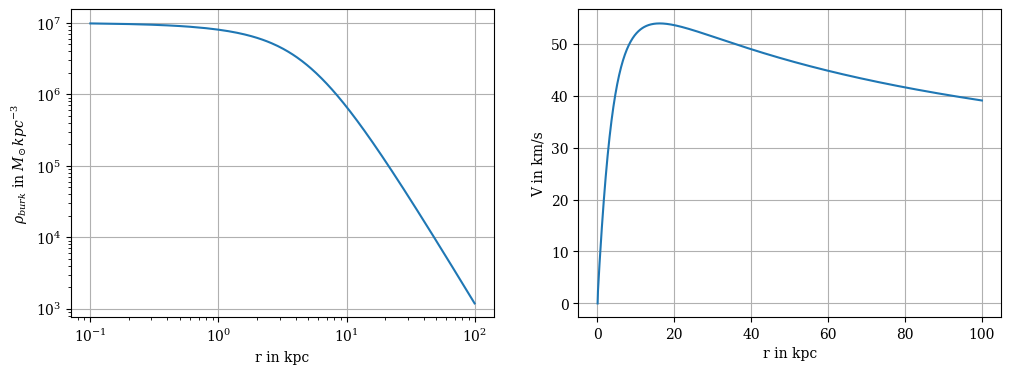

In [285]:
fig,axs = plt.subplots(1,2,figsize = (12,4))

axs[0].plot(r,burk)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel(r'$\rho_{burk}$ in $M_{\odot}\,kpc^{-3}$')

axs[1].plot(r,vburk)
axs[1].set_ylabel('V in km/s')

for ax in axs:
    ax.grid()
    ax.set_xlabel('r in kpc')

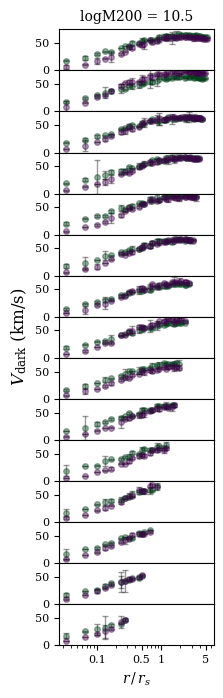

In [42]:
purple = (0.25098039215686274, 0.0, 0.29411764705882354, 1.0)
green = (0.0, 0.26666666666666666, 0.10588235294117647, 1.0)
fig,axs = plt.subplots(15,1,figsize = (2,8),gridspec_kw= {'wspace':0,'hspace':0},sharex = True)
axs = axs.flatten()
for lm_i in [5]:
    for rn_i in range(15):
        for i in [21]:
            for model in ['N','S']:
                gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                data = np.loadtxt('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/%s.dat'%gal)
                r,vc,ve = data[:,0],data[:,1],data[:,2]
                vbarysq = data[:,3]**2 + bry[gal]['original']['yd']*data[:,4]**2 
                vd = np.sqrt(vc**2 - vbarysq)
                ax = axs[14-rn_i]
                clr = green if 'N' in gal else purple
                rs = bry[gal]['original']['rs']
                ax.errorbar(r/rs,vd,ve, color = clr, fmt = 'o', ecolor = 'k', capsize = 2, 
                            alpha = 0.4, elinewidth = 1, mec = clr,ms = 4)
                ax.set_ylim(0,75)
                # ax.set_xlim(0.1,50)
                ax.set_xscale('log')
                ax.tick_params(axis = 'both',labelsize = 8)
axs[14].set_xticks([0.1,0.5,1,5])
axs[14].set_xticklabels([0.1,0.5,1,5])
axs[14].set_xlabel('$r\,/\,r_s$',size = 10)
axs[7].set_ylabel('$V_{\mathrm{dark}}$ (km/s)', size = 12)
axs[0].set_title('logM200 = 10.5',size = 10);
plt.savefig('../Output/presentation1/mock_RCs.png',dpi = 300, bbox_inches = 'tight',transparent = False)

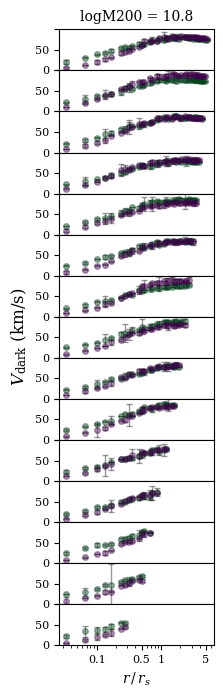

In [55]:
purple = (0.25098039215686274, 0.0, 0.29411764705882354, 1.0)
green = (0.0, 0.26666666666666666, 0.10588235294117647, 1.0)
fig,axs = plt.subplots(15,1,figsize = (2,8),gridspec_kw= {'wspace':0,'hspace':0},sharex = True)
axs = axs.flatten()
for lm_i in [6]:
    for rn_i in range(15):
        for i in [21]:
            for model in ['N','S']:
                gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                data = np.loadtxt('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/%s.dat'%gal)
                r,vc,ve = data[:,0],data[:,1],data[:,2]
                vbarysq = data[:,3]**2 + bry[gal]['original']['yd']*data[:,4]**2 
                vd = np.sqrt(vc**2 - vbarysq)
                ax = axs[14-rn_i]
                clr = green if 'N' in gal else purple
                rs = bry[gal]['original']['rs']
                ax.errorbar(r/rs,vd,ve, color = clr, fmt = 'o', ecolor = 'k', capsize = 2, 
                            alpha = 0.4, elinewidth = 1, mec = clr,ms = 4)
                ax.set_ylim(0,100)
                ax.set_yticks([0,50,100])
                ax.set_yticklabels([0,50,''])
                # ax.set_xlim(0.01,5.5)
                ax.set_xscale('log')
                ax.tick_params(axis = 'both',labelsize = 8)
axs[14].set_xticks([0.1,0.5,1,5])
axs[14].set_xticklabels([0.1,0.5,1,5])
axs[14].set_xlabel('$r\,/\,r_s$',size = 10)
axs[7].set_ylabel('$V_{\mathrm{dark}}$ (km/s)', size = 12)
axs[0].set_title('logM200 = 10.8',size = 10);
plt.savefig('../Output/presentation1/mock_RCs_2.png',dpi = 300, bbox_inches = 'tight',transparent = False)

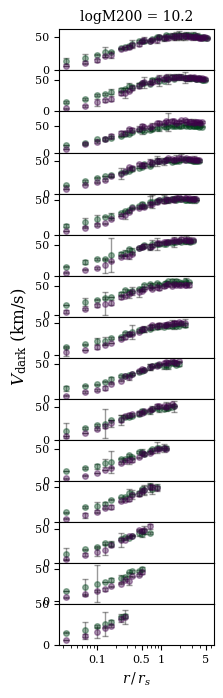

In [54]:
purple = (0.25098039215686274, 0.0, 0.29411764705882354, 1.0)
green = (0.0, 0.26666666666666666, 0.10588235294117647, 1.0)
fig,axs = plt.subplots(15,1,figsize = (2,8),gridspec_kw= {'wspace':0,'hspace':0},sharex = True)
axs = axs.flatten()
for lm_i in [4]:
    for rn_i in range(15):
        for i in [21]:
            for model in ['N','S']:
                gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                data = np.loadtxt('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/%s.dat'%gal)
                r,vc,ve = data[:,0],data[:,1],data[:,2]
                vbarysq = data[:,3]**2 + bry[gal]['original']['yd']*data[:,4]**2 
                vd = np.sqrt(vc**2 - vbarysq)
                ax = axs[14-rn_i]
                clr = green if 'N' in gal else purple
                rs = bry[gal]['original']['rs']
                ax.errorbar(r/rs,vd,ve, color = clr, fmt = 'o', ecolor = 'k', capsize = 2, 
                            alpha = 0.4, elinewidth = 1, mec = clr,ms = 4)
                # ax.set_ylim(0,100)
                ax.set_yticks([0,50])
                ax.set_yticklabels([0,50])
                # ax.set_xlim(0.01,5.5)
                ax.set_xscale('log')
                ax.tick_params(axis = 'both',labelsize = 8)
axs[14].set_xticks([0.1,0.5,1,5])
axs[14].set_xticklabels([0.1,0.5,1,5])
axs[14].set_xlabel('$r\,/\,r_s$',size = 10)
axs[7].set_ylabel('$V_{\mathrm{dark}}$ (km/s)', size = 12)
axs[0].set_title('logM200 = 10.2',size = 10);
plt.savefig('../Output/presentation1/mock_RCs_3.png',dpi = 300, bbox_inches = 'tight',transparent = False)

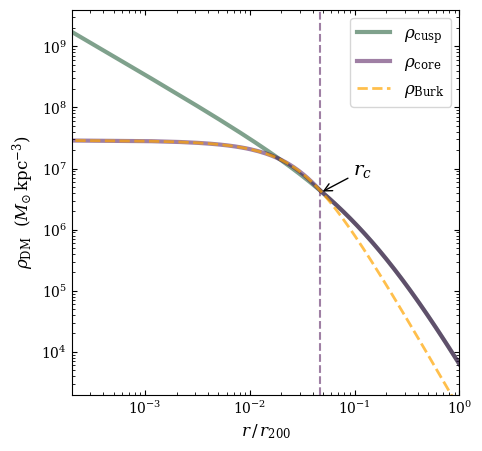

In [60]:
lm = 10.5
rs = 10.
rc = 3.
r200 = pp.r200_nfw(lm)
r = np.linspace(0.01,r200,1000)
fig,ax = plt.subplots(figsize = (5,5))

ax.plot(r/r200,pp.density_nfw(lm,rs,r),c = green, label = r'$\rho_{\mathrm{cusp}}$',lw= 3,alpha = 0.5)
ax.plot(r/r200,pp.density_sidm(lm,rs,rc,r),c = purple, label = r'$\rho_{\mathrm{core}}$',lw = 3,alpha = 0.5)
rhob,rb = pp.rhob_rb_burk(lm,rs,rc)
ax.plot([rc/r200,rc/r200],[2e3,4e9],c = purple,alpha =0.5, ls = '--')
ax.annotate("$r_c$", xy=(rc/r200, 4e6), xytext=(rc/r200+0.05, 8e6),
            arrowprops=dict(arrowstyle="->"),size = 14)
ax.plot(r/r200,pp.density_burk(rhob,rb,r),c = 'Orange', alpha = 0.7,
        lw = 2, label = r'$\rho_{\mathrm{Burk}}$',ls = '--')

ax.set_xlim(2e-4,1e0)
ax.set_ylim(2e3,4e9)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(prop = {'size':12})
ax.tick_params(right = True, top = True, which = 'both', direction = 'in')
ax.set_ylabel(r'$\rho_{\mathrm{DM}}$  ($M_{\odot}\,\mathrm{kpc}^{-3}$)',size = 12)
ax.set_xlabel(r'$r\,/\,r_{200}$',size = 12)
# ax.grid(which = 'both')

plt.savefig('../Output/presentation1/density_plot3.png',transparent = False,bbox_inches = 'tight', dpi = 300)

In [108]:
sparc_min_rs = np.loadtxt('../../Accessory/min_rs.txt')
gals = json.load(open('../../Accessory/galnames.json','r'))
Rlast = np.array([np.loadtxt('../../Accessory/RotCurvs/%s_rotmod.dat'%gal)[:,0][-1] for gal in gals])
ratio = Rlast/sparc_min_rs

In [112]:
sizes = [0,.2,.4,.6,.8,1.,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4]
prior = 'lcdm'
RF = np.zeros([N,len(sizes)-1])
for i in range(N):
    gal = gals[i]
    r = np.array(sparcd[prior][gal]['r'])
    rt = r/sparc_min_rs[i]
    for rad in rt:
        for j in range(len(sizes)-1):
            if sizes[j] < rad <= sizes[j+1]:
                RF[i,j] += 1

In [117]:
RF_mean = []
RF_std = []
for i in range(len(sizes)-1):
    rf = RF[:,i]
    rf = rf[rf > 0]
    RF_mean.append(np.mean(rf))
    RF_std.append(np.std(rf))
# RF_MEAN = np.int32(np.round(RF_mean,0))
RF_MEAN = [5, 4, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1]

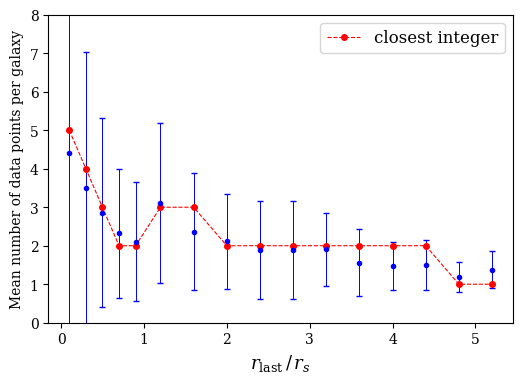

In [133]:
fig,ax = plt.subplots(figsize = (6,4))

x = 0.5*(np.array(sizes)[:-1] + np.array(sizes)[1:])
ax.errorbar(x,RF_mean,RF_std,fmt = '.', c = 'b',capsize = 2,elinewidth = 0.7)
ax.plot(x,RF_MEAN, c = 'r', marker = '.',ms = 8,lw = 0.8,ls = '--', label = 'closest integer')
ax.set_ylim(0,8)
ax.legend(prop = {'size':12})
ax.set_ylabel('Mean number of data points per galaxy')
ax.set_xlabel(r'$r_{\mathrm{last}}\,/\,r_s$',size = 13)

plt.savefig('../Output/presentation1/RF.png',bbox_inches = 'tight',dpi = 300)

In [128]:
errdict_fid = json.load(open('../../Accessory/Error_dist_fiducial.json','r'))

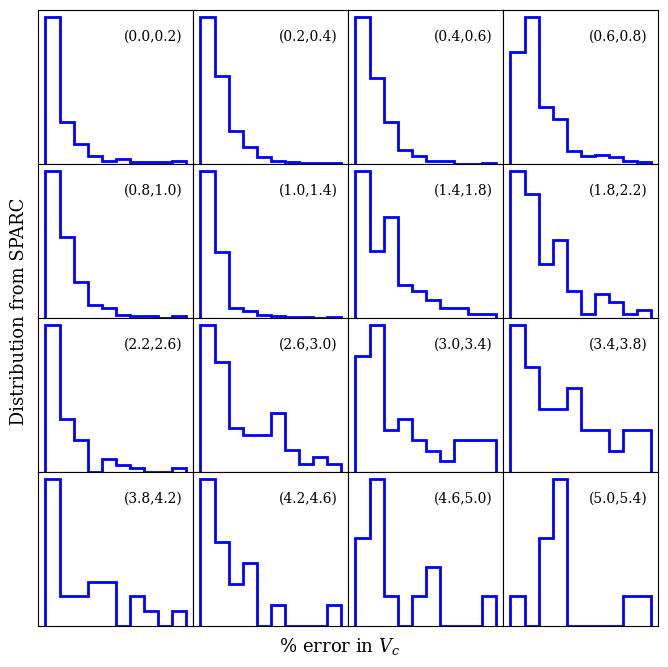

In [180]:
fig,axs = plt.subplots(4,4,figsize = (8,8),gridspec_kw = {'wspace':0,'hspace':0})
axs = axs.flatten()
for i in range(16):
    err = errdict_fid[str(i)]
    ax = axs[i]
    ax.hist(err,color = 'b',alpha = 1,histtype = 'step',linewidth = 2)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.text(0.55,0.8,'(%.1f,%.1f)'%(sizes[i],sizes[i+1]),transform = ax.transAxes)
axs[13].set_xlabel('                        % error in $V_c$',size = 13)
axs[8].set_ylabel('                             Distribution from SPARC',size = 13)
plt.savefig('../Output/presentation1/error_dist.png',bbox_inches = 'tight',dpi = 300)

In [214]:
sizes = [0,.2,.4,.6,.8,1.,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4]
N = len(gals)
RF = np.zeros([N,len(sizes)-1])
sort_size = []
for i in range(N):
    gal = gals[i]
    r = np.loadtxt('../../Accessory/RotCurvs/%s_rotmod.dat'%gal)[:,0]
    rt = r/sparc_min_rs[i]
    for rad in rt:
        for j in range(len(sizes)-1):
            if sizes[j] < rad <= sizes[j+1]:
                RF[i,j] += 1
                sort_size.append(0.5*(sizes[j]+sizes[j+1]))

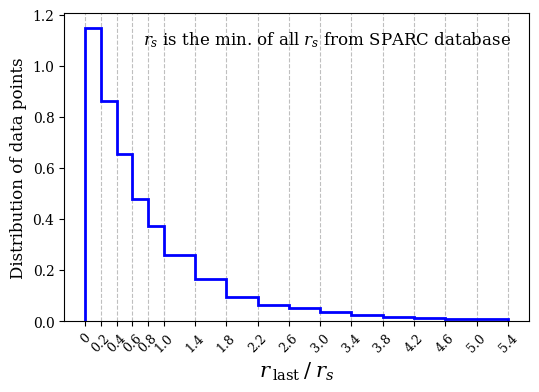

In [215]:
fig,ax = plt.subplots(figsize = (6,4))
ax.hist(sort_size, sizes, histtype= 'step', color = 'b', lw = 2,density = True)
ax.set_xlabel('$r_{\:\mathrm{last}}\:/\:r_s$',size = 15)
ax.set_ylabel('Distribution of data points',size = 12)
ax.set_xticks(sizes,labels = ['' for i in range(len(sizes))])
# ax.set_xticklabels([0,'','',0.6,'',1.,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4],size = 9)
ax.set_xticklabels(sizes, rotation = 45, size = 9)
ax.grid(ls = '--',color = 'grey',alpha = 0.5,axis = 'x')
ax.text(0.17,0.9,'$r_s$ is the min. of all $r_s$ from SPARC database',size = 12,transform = ax.transAxes)
plt.savefig('../Output/presentation1/dist_dpts.png',bbox_inches = 'tight',dpi = 300)

In [216]:
Bestgals = json.load(open('../Output/Bestgals.json','r'))

In [220]:
for gal in Bestgals['CC_75']:
    if sparcd['lcdm'][gal]['bulge']:
        print ('yes there is bulge in %s'%gal)

yes there is bulge in IC4202
yes there is bulge in NGC5005
yes there is bulge in NGC5033
yes there is bulge in NGC5985
yes there is bulge in NGC6195
yes there is bulge in UGC02916
yes there is bulge in UGC03580
yes there is bulge in UGC05253


In [14]:
def get_MC_data(prior,bestfit = None):
    m200,em200,c200,ec200 = [],[],[],[]
    clrs = []
    for gal in gals_sel[prior]:
        if not bestfit:
            try:
                bestfit = sparcd[prior][gal]['best_fit']
            except:
                continue
        gald = sparcd[prior][gal][bestfit]
        m200.append(gald['m200'][0])
        em200.append(gald['m200'][1])
        c200.append(gald['c200'][0])
        ec200.append(gald['c200'][1])
        clr = pa.green if bestfit == 'cusp_fit' else pa.purple
        # clrs.append(clr)
        clrs.append(sparcd[prior][gal]['delta_lnZ'])
    return m200,em200,c200,ec200,clrs

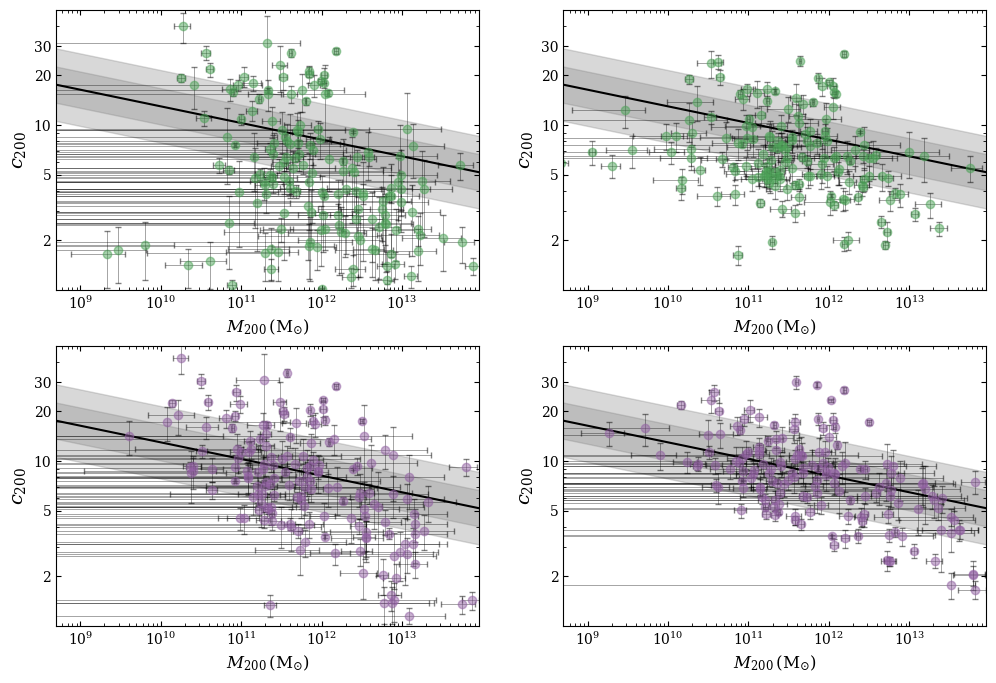

In [15]:
fig,axs = plt.subplots(2,2,figsize = (12,8))
lm = np.linspace(8.5,14.5,10)
lc = pp.lc200_SR(lm)
priors = ['flat','lcdm']
bestfits = ['cusp_fit','core_fit']
for i in range(2):
    for j in range(2):
        ax = axs[j,i]
        ax.plot(10**lm,10**lc,c = 'k')
        ax.fill_between(10**lm,10**(lc+0.11),10**(lc-0.11),alpha = 0.3,color = 'grey')
        ax.fill_between(10**lm,10**(lc+0.22),10**(lc-0.22),alpha = 0.3,color = 'grey')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(5e8,9e13)
        ax.set_ylim(1,50)
        ax.set_yticks([2,5,10,20,30],[2,5,10,20,30])
        m200,em200,c200,ec200,clrs = get_MC_data(priors[i],bestfits[j])
        clr = pa.green if bestfits[j] == 'cusp_fit' else pa.purple
        # ax.scatter(m200,c200, color = clr, alpha = 0.5)
        ax.errorbar(m200,c200,xerr=em200,yerr=ec200,fmt = 'o',color = clr, ecolor = 'k', capsize = 2, elinewidth = 0.5,alpha = 0.5)
        
        ax.set_ylabel('$c_{200}$',size = 14)
        ax.set_xlabel('$M_{200}\,\mathrm{(M_{\odot})}$',size = 12)
        ax.tick_params(which = 'both',direction = 'in', right = True, top = True)

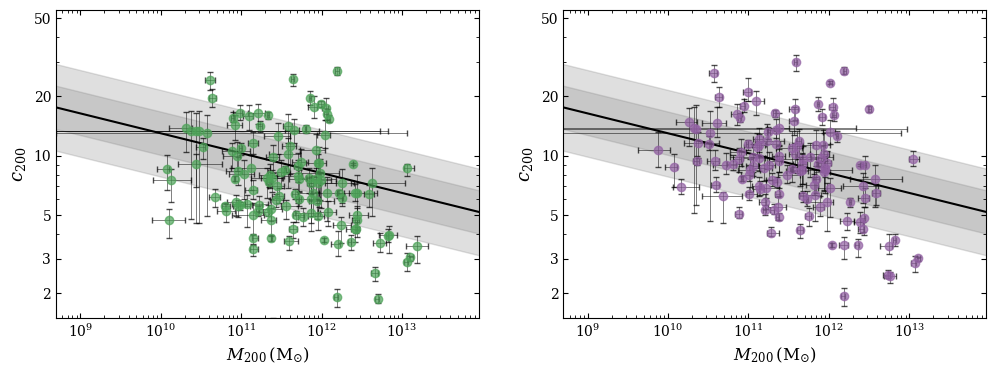

In [9]:
fig,axs = pa.axs_MCR()
prior = 'lcdm_vmax'
fits = ['cusp_fit','core_fit']
for i in range(2):
    fit = fits[i]
    for gal in sparcd[prior]:
        gald = sparcd[prior][gal]
        if not gald['vflat']:
            continue
        if gald['Inc'][0] < 30:
            continue
        if gald["Q"] == 3:
            continue
        mcr = gald[fit]['MCR']
        pa.scatt_MCR(axs[i], mcr,alpha = 0.7)

In [19]:
for gal in ['NGC4559','UGC02916','UGC07125']:
    bestfit = sparcd[prior][gal]['best_fit']
    gald = sparcd[prior][gal][bestfit]
    print (sparcd[prior][gal]['rlast']/gald['rs'][0])
    print (sparcd[prior][gal]['bulge'])

0.8323907536924513
False
1.4523939074462762
True
0.6879623946552417
False


(2000000000.0, 50000000000000.0)

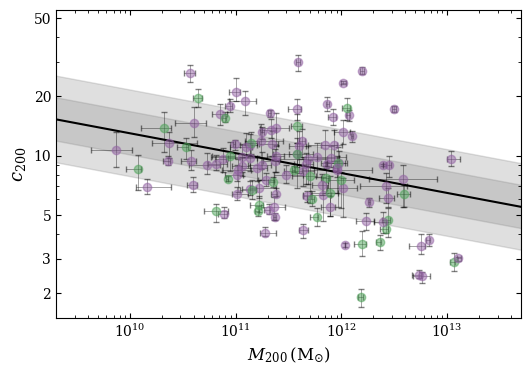

In [4]:
fig,ax = pa.axs_MCR(1,1,figsize = (6,4))
prior = 'lcdm_vmax'
for gal in sparcd[prior]:
    gald = sparcd[prior][gal]
    if not gald['vflat']:
        continue
    if gald['Inc'][0] < 30:
        continue
    if gald["Q"] == 3:
        continue
    fit = gald['best_fit']
    mcr = gald[fit]['MCR']
    if mcr[2][0] > 0.6*mcr[0]:
        continue
    pa.scatt_MCR(ax, mcr,alpha = 0.5)
ax.set_xlim(2e9,5e13)

In [19]:
sparcd[prior][gal].keys()

dict_keys(['r', 'vc', 've', 'vg', 'vd', 'vb', 'gal', 'dpts', 'vflat', 'H0_type', 'Inc', 'D', 'Q', 'bulge', 'lmgas_1', 'lmdisk_1', 'rdgas_1', 'rdstar_1', 'cusp_fit', 'core_fit', 'delta_lnZ', 'delta_BIC', 'delta_AIC', 'delta_rchi', 'best_fit', 'rlast'])

In [46]:
np.sqrt(2)

1.4142135623730951

In [59]:
a = 0.6
if not 0.7 <= a <= 1.4:
    print ('condition not satisfied')

condition not satisfied


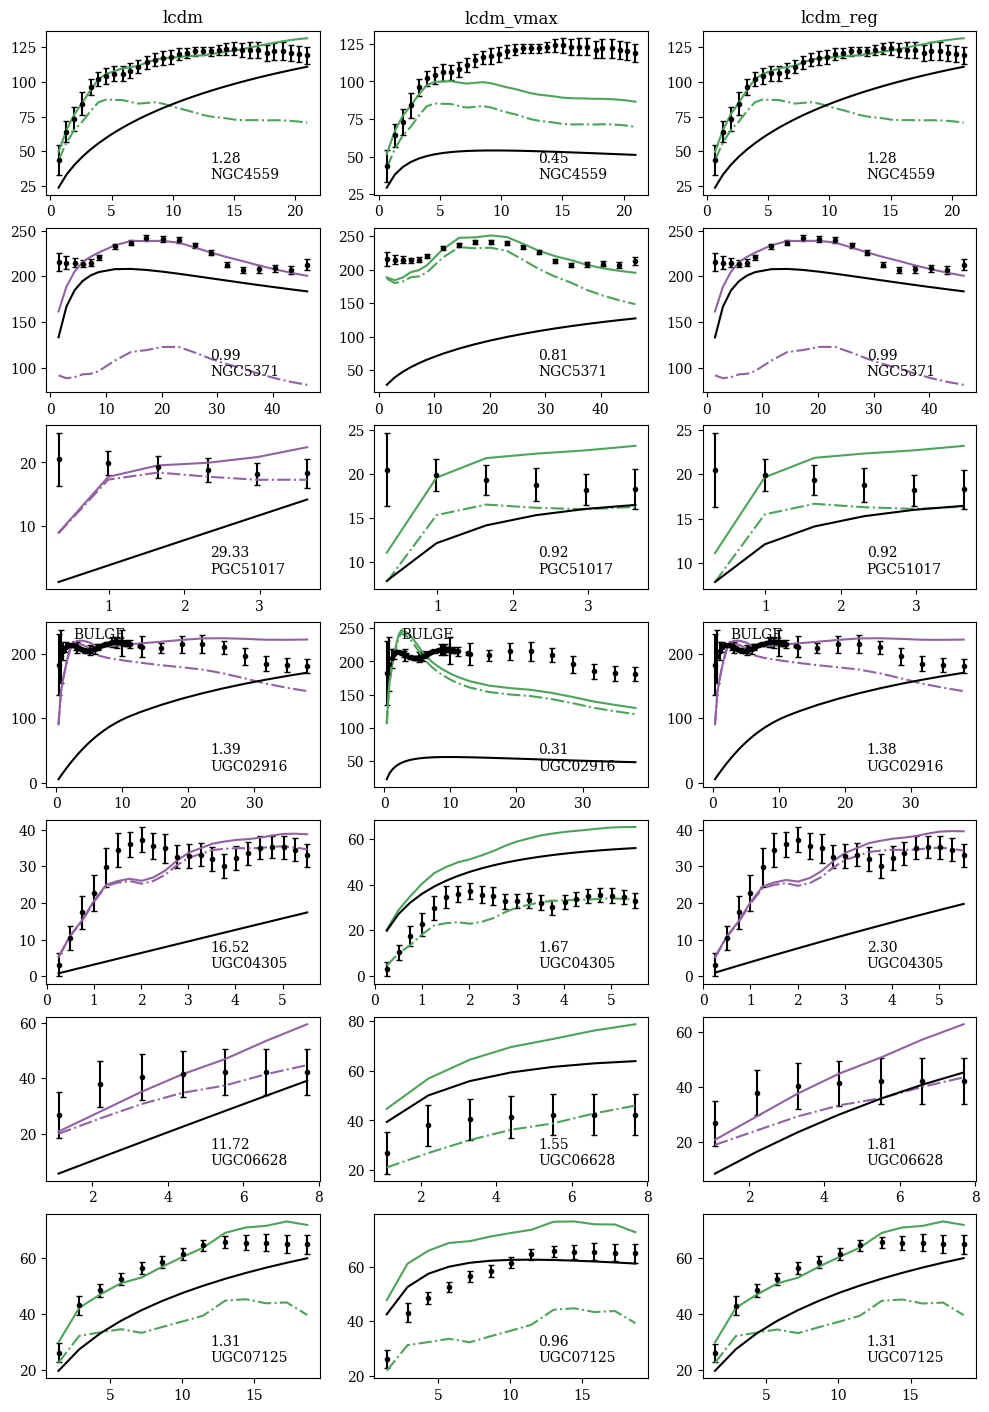

In [119]:
gals = ['NGC4559','NGC5371','PGC51017','UGC02916','UGC04305','UGC06628','UGC07125']
priors = ['lcdm','lcdm_vmax','lcdm_reg']
fig,axs = plt.subplots(len(gals),len(priors), figsize = (12,len(gals)*2.5))
for i in range(len(gals)):
    gal = gals[i]
    for ax,prior in zip(axs[i],priors):
        gald = sparcd[prior][gal]
        ax.errorbar(gald['r'],gald['vc'],gald['ve'],fmt = '.', color = 'k', capsize = 2)
        bestfit = sparcd[prior][gal]['best_fit']
        clr = pa.green if bestfit == 'cusp_fit' else pa.purple
        ax.plot(gald['r'],gald[bestfit]['vcmodel'],color = clr)
        ax.plot(gald['r'],gald[bestfit]['vbary'],color =clr, ls= '-.')
        vdm = np.sqrt(np.array(gald[bestfit]['vcmodel'])**2 - np.array(gald[bestfit]['vbary'])**2)
        ax.plot(gald['r'],vdm,color = 'k')
        ax.text(0.6,0.1,gal,transform = ax.transAxes)
        lm = gald[bestfit]['lm'][0]
        c2 = gald[bestfit]['c200'][0]
        rs = pnp.rs_nfw(lm,c2)
        vmax = pp.v_nfw(lm,rs,2.16258*rs)
        vflat = gald['vflat']
        ax.text(0.6,0.2,'%.2f'%(vmax/vflat),transform = ax.transAxes)
        if gald['bulge']:
            ax.text(0.1,0.9,'BULGE',transform = ax.transAxes)
        
for i in range(len(priors)):
    axs[0][i].set_title(priors[i])

Text(0.5, 1.0, 'LCDM Vmax')

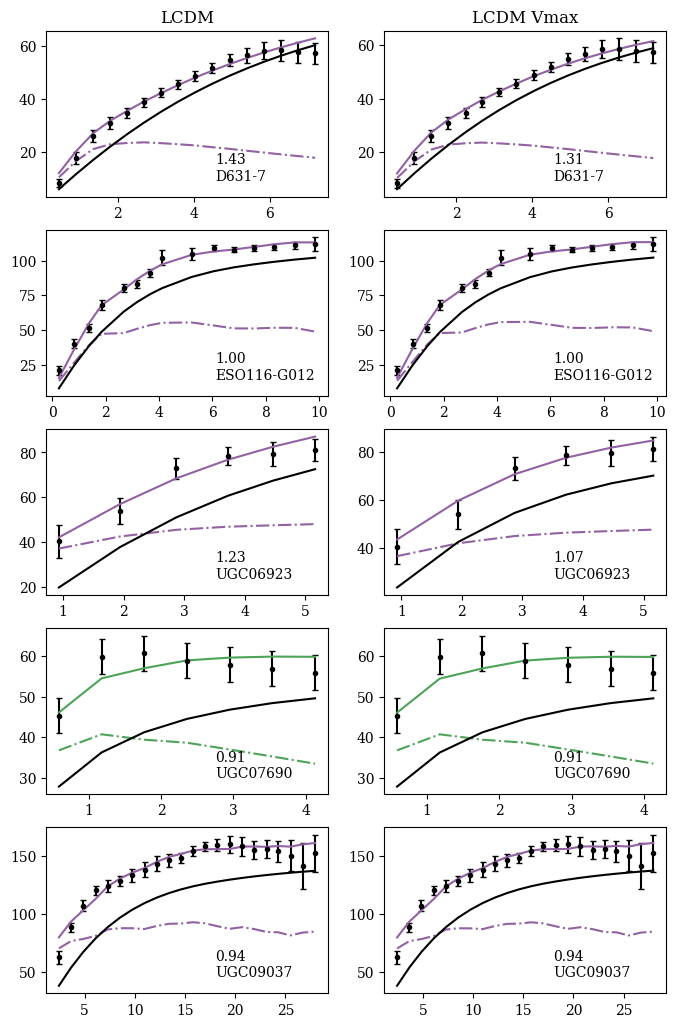

In [74]:
gals = ['D631-7','ESO116-G012','UGC06923','UGC07690','UGC09037',]
fig,axs = plt.subplots(len(gals),2, figsize = (8,len(gals)*2.5))
for i in range(len(gals)):
    ax1,ax2 = axs[i]
    gal = gals[i]
    for ax,prior in zip([ax1,ax2],['lcdm','lcdm_vmax']):
        gald = sparcd[prior][gal]
        ax.errorbar(gald['r'],gald['vc'],gald['ve'],fmt = '.', color = 'k', capsize = 2)
        bestfit = sparcd[prior][gal]['best_fit']
        clr = pa.green if bestfit == 'cusp_fit' else pa.purple
        ax.plot(gald['r'],gald[bestfit]['vcmodel'],color = clr)
        ax.plot(gald['r'],gald[bestfit]['vbary'],color =clr, ls= '-.')
        vdm = np.sqrt(np.array(gald[bestfit]['vcmodel'])**2 - np.array(gald[bestfit]['vbary'])**2)
        ax.plot(gald['r'],vdm,color = 'k')
        ax.text(0.6,0.1,gal,transform = ax.transAxes)
        lm = gald[bestfit]['lm'][0]
        c2 = gald[bestfit]['c200'][0]
        rs = pnp.rs_nfw(lm,c2)
        vmax = pp.v_nfw(lm,rs,2.16258*rs)
        vflat = gald['vflat']
        ax.text(0.6,0.2,'%.2f'%(vmax/vflat),transform = ax.transAxes)
        if gald['bulge']:
            ax.text(0.1,0.9,'BULGE',transform = ax.transAxes)
        
axs[0][0].set_title('LCDM')
axs[0][1].set_title('LCDM Vmax')

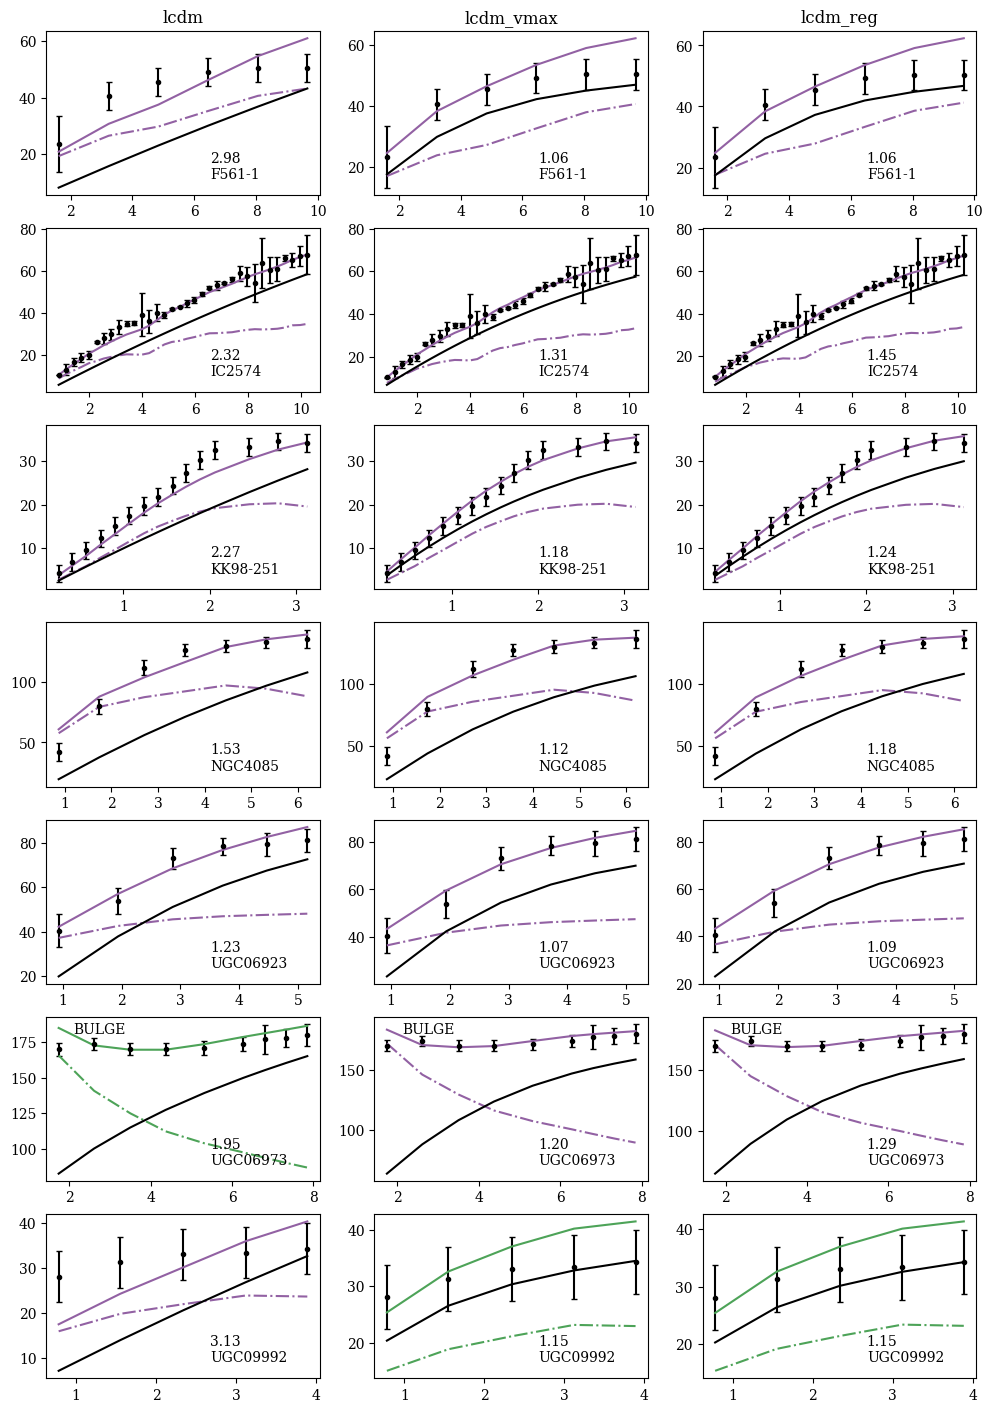

In [121]:
gals = ['F561-1','IC2574','KK98-251','NGC4085','UGC06923','UGC06973','UGC09992']
priors = ['lcdm','lcdm_vmax','lcdm_reg']
fig,axs = plt.subplots(len(gals),len(priors), figsize = (4*len(priors),len(gals)*2.5))
for i in range(len(gals)):
    gal = gals[i]
    for ax,prior in zip(axs[i],priors):
        gald = sparcd[prior][gal]
        ax.errorbar(gald['r'],gald['vc'],gald['ve'],fmt = '.', color = 'k', capsize = 2)
        bestfit = sparcd[prior][gal]['best_fit']
        clr = pa.green if bestfit == 'cusp_fit' else pa.purple
        ax.plot(gald['r'],gald[bestfit]['vcmodel'],color = clr)
        ax.plot(gald['r'],gald[bestfit]['vbary'],color =clr, ls= '-.')
        vdm = np.sqrt(np.array(gald[bestfit]['vcmodel'])**2 - np.array(gald[bestfit]['vbary'])**2)
        ax.plot(gald['r'],vdm,color = 'k')
        ax.text(0.6,0.1,gal,transform = ax.transAxes)
        lm = gald[bestfit]['lm'][0]
        c2 = gald[bestfit]['c200'][0]
        rs = pnp.rs_nfw(lm,c2)
        vmax = pp.v_nfw(lm,rs,2.16258*rs)
        vflat = gald['vflat']
        ax.text(0.6,0.2,'%.2f'%(vmax/vflat),transform = ax.transAxes)
        if gald['bulge']:
            ax.text(0.1,0.9,'BULGE',transform = ax.transAxes)
        
for i in range(len(priors)):
    axs[0][i].set_title(priors[i])

In [ ]:
[NGC3741 , NGC5033, NGC5907, NGC5985 , UGC00731, UGC02487 , UGC04325, UGC07524,
UGCA444, UGC08550]

F561-1
IC2574
KK98-251
NGC4085
UGC06923
UGC06973
UGC09992


(2000000000.0, 100000000000000.0)

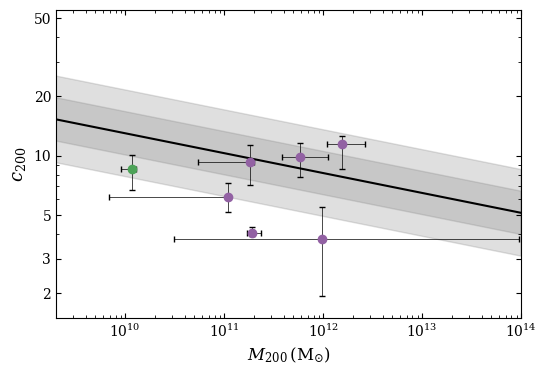

In [85]:
fig,ax = pa.axs_MCR(1,1,figsize = (6,4))
for gal in sparcd['lcdm_vmax']:
    lnZ_vmax = sparcd['lcdm_vmax'][gal]['delta_lnZ']
    lnZ = sparcd['lcdm'][gal]['delta_lnZ']
    if np.abs(lnZ_vmax) > np.abs(lnZ):
        prior = 'lcdm_vmax'
    else:
        prior = 'lcdm'

    bestfit = sparcd[prior][gal]['best_fit']
    # if prior == 'lcdm':
        # print (gal,np.around(sparcd['lcdm_vmax'][gal][bestfit]['rchi'],2),
        #        np.around(sparcd['lcdm'][gal][bestfit]['rchi'],2))
    rchi1 = sparcd['lcdm_vmax'][gal][bestfit]['rchi']
    rchi2 = sparcd['lcdm'][gal][bestfit]['rchi']
    if np.abs(rchi1 - 1) + 0.2< np.abs(rchi2 - 1) :
        print (gal)
        pa.scatt_MCR(ax,sparcd[prior][gal][bestfit]['MCR'])
ax.set_xlim(2e9,1e14)

0.1079819330263761 0.1079819330263761


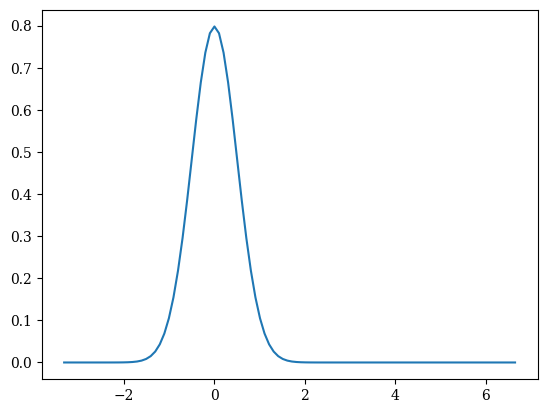

In [113]:
x = np.logspace(-1,2,100)
n = np.log10(x)/np.log10(2)
dist = sp.stats.norm.pdf(n,0,1/2)
plt.plot(n,dist)
print (sp.stats.norm.pdf(-1,0,0.5),sp.stats.norm.pdf(1,0,1/2))

In [14]:
sparcd['lcdm']['D512-2'].keys()

dict_keys(['r', 'vc', 've', 'vg', 'vd', 'vb', 'gal', 'dpts', 'vflat', 'H0_type', 'Inc', 'D', 'Q', 'bulge', 'lmgas_1', 'lmdisk_1', 'rdgas_1', 'rdstar_1', 'cusp_fit', 'core_fit', 'rlast'])

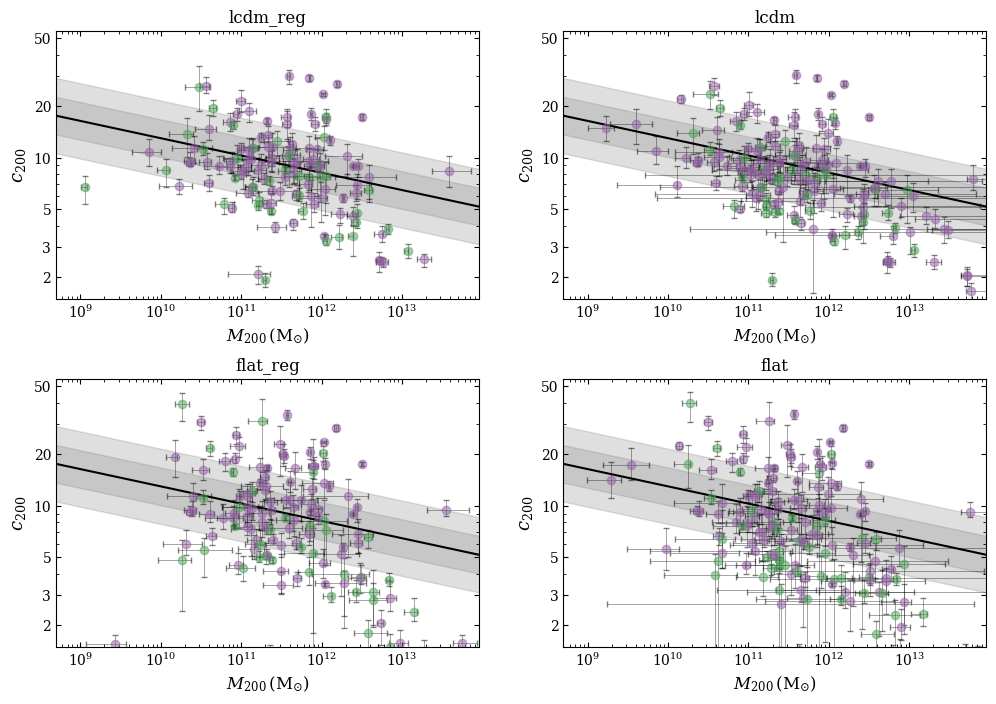

In [21]:
fig,axs = pa.axs_MCR(2,2,hspace = 0.3)
priors = ['lcdm_reg','lcdm','flat_reg','flat']
for ax,prior in zip(axs,priors):
    for gal in sel_gals[prior]:
        bestfit = sparcd[prior][gal]['best_fit']
        mcr = sparcd[prior][gal][bestfit]['MCR']
        pa.scatt_MCR(ax,mcr,alpha = 0.5)
        ax.set_title(prior)

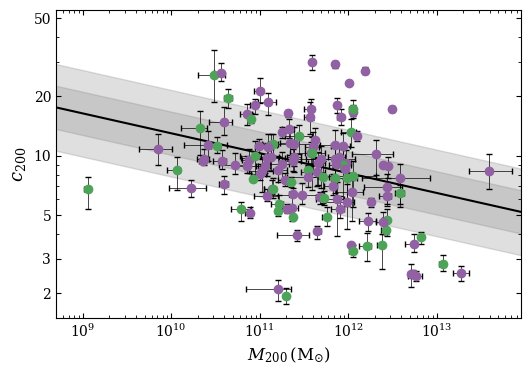

In [18]:
fig,ax = pa.axs_MCR(1,1)
prior = 'lcdm_reg'
for gal in sel_gals[prior]:
    bestfit = sparcd[prior][gal]['best_fit']
    mcr = sparcd[prior][gal][bestfit]['MCR']
    pa.scatt_MCR(ax,mcr)

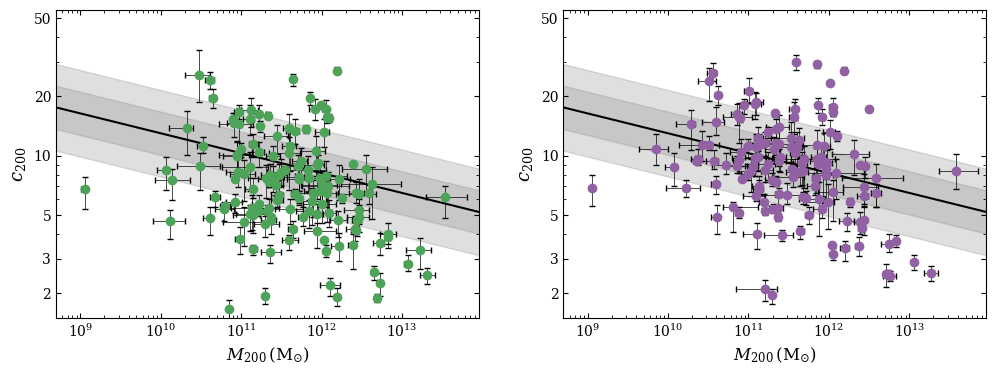

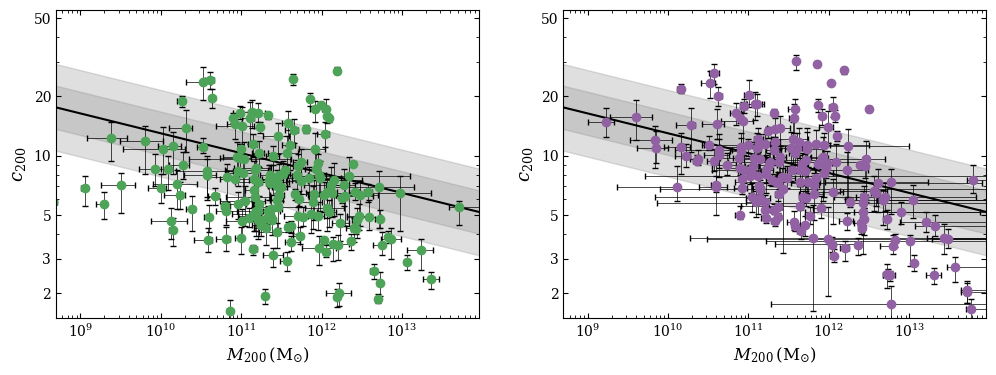

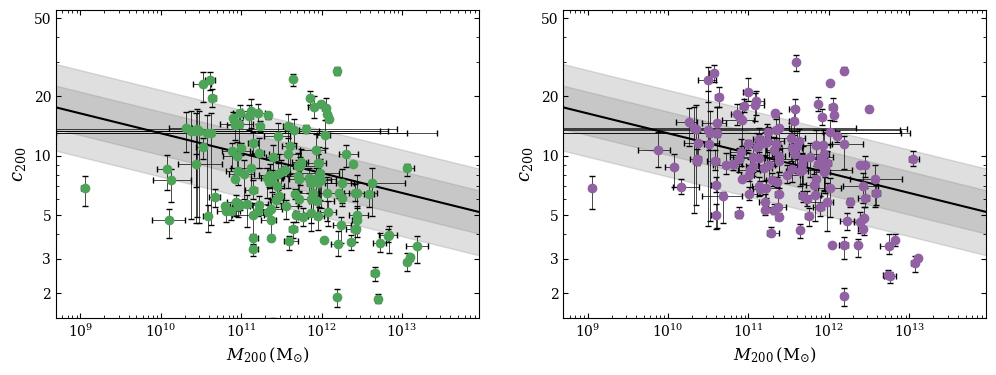

In [5]:
fig,axs = pa.axs_MCR(1,2)
prior = 'lcdm_reg'
for gal in sparcd[prior]:
    mcr_cusp = sparcd[prior][gal]['cusp_fit']['MCR']
    mcr_core = sparcd[prior][gal]['core_fit']['MCR']
    pa.scatt_MCR(axs[0],mcr_cusp)
    pa.scatt_MCR(axs[1],mcr_core)
    
fig,axs = pa.axs_MCR(1,2)
prior = 'lcdm'
for gal in sparcd[prior]:
    mcr_cusp = sparcd[prior][gal]['cusp_fit']['MCR']
    mcr_core = sparcd[prior][gal]['core_fit']['MCR']
    pa.scatt_MCR(axs[0],mcr_cusp)
    pa.scatt_MCR(axs[1],mcr_core)
    
fig,axs = pa.axs_MCR(1,2)
prior = 'lcdm_vmax'
for gal in sparcd[prior]:
    mcr_cusp = sparcd[prior][gal]['cusp_fit']['MCR']
    mcr_core = sparcd[prior][gal]['core_fit']['MCR']
    pa.scatt_MCR(axs[0],mcr_cusp)
    pa.scatt_MCR(axs[1],mcr_core)

(0.1, 20)

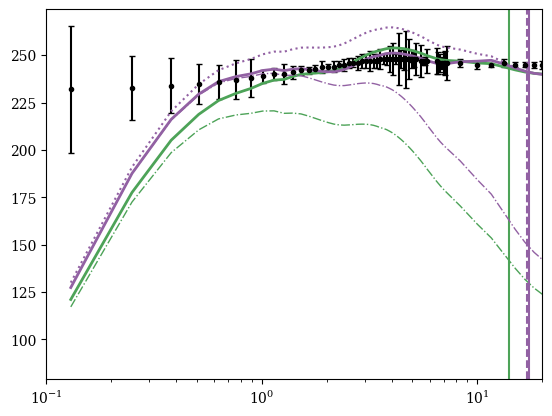

In [15]:
gal = 'UGC05253'
fig,ax = plt.subplots()
pa.plot_RC(gal,sparcd,ax = ax)
ax.set_xscale('log')
ax.set_xlim(1e-1,20)